In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0), (1.0, 0.1), (1.0, 1.0), (0.1, 0.1)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_mlp_pca_gdf_que_prev10'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'], folds=2)
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [21]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/mlp_pca_gdf_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
columns = ['f1', 'features', 'kappa', 'hidden_layer_sizes', 
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
# df_res = df_res[df_res['r'] == 0.1]
# df_res = df_res[df_res['s'] == 0.1]
# df_res = df_res[df_res['hidden_layer_sizes'] == '(16, 16)']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,f1,features,kappa,hidden_layer_sizes,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
13,0.609057,pca_gdf_que_prev10,0.191180,"(16, 16)",0.193830,0.595376,11946,0.638104,0.200596,0.201930,0.599834,0.1,0.1
5,0.586839,pca_gdf_que_prev10,0.173964,"(16, 16)",0.176045,0.587324,3879,0.570067,0.098479,0.099171,0.549295,0.1,0.1
12,0.576069,pca_gdf_que_prev10,0.173020,"(8, 16)",0.174937,0.586756,7858,0.459886,0.130469,0.138448,0.564298,0.1,1.0
5,0.604752,pca_gdf_que_prev10,0.168605,"(16, 16)",0.170008,0.584310,3035,0.579737,0.101012,0.101339,0.550399,0.1,1.0
26,0.617889,pca_gdf_que_prev10,0.165005,"(16, 8)",0.166571,0.582354,4320,0.635838,0.172242,0.174229,0.585471,1.0,0.1
14,0.601701,pca_gdf_que_prev10,0.156562,"(16, 8)",0.161776,0.578453,1472,0.638529,0.114579,0.118693,0.556268,1.0,0.1
23,0.596168,pca_gdf_que_prev10,0.159113,"(8, 8)",0.160775,0.579701,9761,0.625767,0.142671,0.147712,0.571105,1.0,1.0
16,0.610128,pca_gdf_que_prev10,0.152757,"(8, 16)",0.158088,0.576412,1956,0.600278,0.137063,0.139015,0.568571,1.0,0.1
12,0.628593,pca_gdf_que_prev10,0.153627,"(8, 16)",0.157321,0.576151,10484,0.586704,0.114037,0.116301,0.557272,1.0,0.1
1,0.600277,pca_gdf_que_prev10,0.153157,"(16, 16)",0.156767,0.576577,12417,0.602982,0.149272,0.151523,0.574796,1.0,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [24]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

Text(0.5,1,'Matthews score distribution for different r and s parameters')

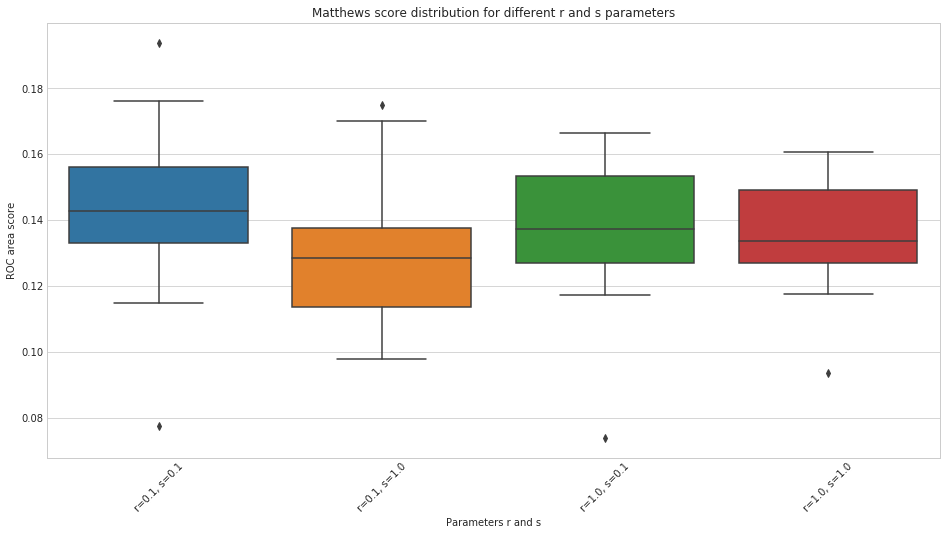

In [32]:
r_s_dict = OrderedDict()
r_parameters = [0.1, 1.0]
s_parameters = [0.1, 1.0]
for r in r_parameters:
    for s in s_parameters:
        r_s_dict['r={}, s={}'.format(r, s)] = df_gdf_best[df_gdf_best['r'] == r][df_gdf_best['s'] == s]['matthews'].values

plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=list(r_s_dict.values()))
plt.ylabel('ROC area score')
plt.xlabel('Parameters r and s')
_ = ax.set_xticklabels(list(r_s_dict.keys()), rotation=45)
plt.title('Matthews score distribution for different r and s parameters')

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
df_all.columns

Index(['f1_svm', 'features', 'kappa_svm', 'hidden_layer_sizes', 'matthews_svm',
       'roc_auc_svm', 'stock', 'test_f1_svm', 'test_kappa_svm',
       'test_matthews_svm', 'test_roc_auc_svm', 'r', 's', 'f1_log',
       'kappa_log', 'kernel', 'matthews_log', 'precision', 'recall',
       'roc_auc_log', 'test_f1_log', 'test_kappa_log', 'test_matthews_log',
       'test_precision', 'test_recall', 'test_roc_auc_log', 'train_f1',
       'train_kappa', 'train_matthews', 'train_precision', 'train_recall',
       'train_roc_auc'],
      dtype='object')

In [9]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm','test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193830,0.195228,0.201930,0.207584,0.595376,0.597678,0.599834,0.603555,11946
1,0.176045,0.156645,0.099171,0.109705,0.587324,0.577662,0.549295,0.554478,3879
2,0.166244,0.186482,0.174229,0.154918,0.582196,0.592922,0.585471,0.577343,4320
3,0.166150,0.180586,0.100797,0.097073,0.582526,0.590223,0.550257,0.548374,3035
4,0.161903,0.153560,0.181733,0.171398,0.580172,0.576792,0.585611,0.584732,7858
5,0.159279,0.144501,0.125772,0.123164,0.577558,0.570231,0.560704,0.557401,1472
6,0.153669,0.176488,0.115452,0.110441,0.575066,0.588278,0.557046,0.555225,10484
7,0.153350,0.140348,0.162124,0.149033,0.575007,0.569520,0.580525,0.573501,12417
8,0.152744,0.179309,0.148617,0.134666,0.575946,0.589699,0.572381,0.566471,9761
9,0.151742,0.158099,0.140823,0.139722,0.574623,0.578773,0.570430,0.567181,4799


In [10]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

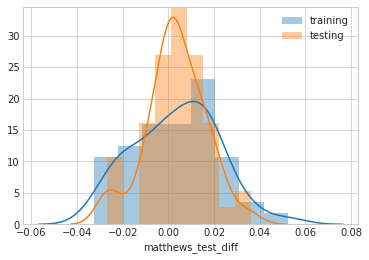

In [11]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

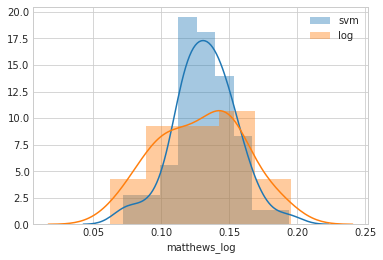

In [12]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [13]:
df_all['matthews_diff'].median(), df_all['matthews_test_diff'].median()

(0.0048090939393803656, 0.002652144590082381)

In [14]:
df_all['matthews_diff'].mean(), df_all['matthews_test_diff'].mean()

(0.0032434031799565832, 0.0033707687819349292)

In [15]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(31, 34, 53)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193830,0.195228,0.201930,0.207584,0.595376,0.597678,0.599834,0.603555,11946
1,0.176045,0.156645,0.099171,0.109705,0.587324,0.577662,0.549295,0.554478,3879
12,0.149369,0.156086,0.141815,0.143297,0.574103,0.577835,0.570890,0.571621,11869
15,0.143420,0.133289,0.116812,0.117822,0.571181,0.566207,0.558030,0.558221,13061
16,0.140957,0.148425,0.126308,0.131784,0.569567,0.573182,0.559883,0.565375,12255
17,0.139766,0.155153,0.143955,0.146313,0.567771,0.577888,0.569774,0.572998,1907
18,0.138947,0.143396,0.148174,0.154511,0.565747,0.571564,0.573830,0.576331,3022
19,0.138684,0.155253,0.120597,0.142525,0.568867,0.577556,0.559538,0.571199,5836
21,0.137683,0.101616,0.106407,0.133375,0.568446,0.550800,0.553134,0.566706,9086
22,0.137256,0.154666,0.114769,0.123602,0.567443,0.576290,0.554406,0.558992,8080


In [17]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(30, 32, 53)

In [18]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193830,0.195228,0.201930,0.207584,0.595376,0.597678,0.599834,0.603555,11946
1,0.176045,0.156645,0.099171,0.109705,0.587324,0.577662,0.549295,0.554478,3879
12,0.149369,0.156086,0.141815,0.143297,0.574103,0.577835,0.570890,0.571621,11869
15,0.143420,0.133289,0.116812,0.117822,0.571181,0.566207,0.558030,0.558221,13061
16,0.140957,0.148425,0.126308,0.131784,0.569567,0.573182,0.559883,0.565375,12255
17,0.139766,0.155153,0.143955,0.146313,0.567771,0.577888,0.569774,0.572998,1907
18,0.138947,0.143396,0.148174,0.154511,0.565747,0.571564,0.573830,0.576331,3022
19,0.138684,0.155253,0.120597,0.142525,0.568867,0.577556,0.559538,0.571199,5836
21,0.137683,0.101616,0.106407,0.133375,0.568446,0.550800,0.553134,0.566706,9086
22,0.137256,0.154666,0.114769,0.123602,0.567443,0.576290,0.554406,0.558992,8080


In [19]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.193830,0.195228,0.201930,0.207584,0.595376,0.597678,0.599834,0.603555,11946
1,0.176045,0.156645,0.099171,0.109705,0.587324,0.577662,0.549295,0.554478,3879
12,0.149369,0.156086,0.141815,0.143297,0.574103,0.577835,0.570890,0.571621,11869
15,0.143420,0.133289,0.116812,0.117822,0.571181,0.566207,0.558030,0.558221,13061
16,0.140957,0.148425,0.126308,0.131784,0.569567,0.573182,0.559883,0.565375,12255
17,0.139766,0.155153,0.143955,0.146313,0.567771,0.577888,0.569774,0.572998,1907
18,0.138947,0.143396,0.148174,0.154511,0.565747,0.571564,0.573830,0.576331,3022
19,0.138684,0.155253,0.120597,0.142525,0.568867,0.577556,0.559538,0.571199,5836
21,0.137683,0.101616,0.106407,0.133375,0.568446,0.550800,0.553134,0.566706,9086
22,0.137256,0.154666,0.114769,0.123602,0.567443,0.576290,0.554406,0.558992,8080
